In [1]:
%matplotlib inline
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy.ndimage.filters import laplace
from scipy.ndimage import (gaussian_gradient_magnitude, sobel, binary_dilation, binary_erosion,
                           maximum_filter, gaussian_laplace)

In [2]:
dataset_root = '/net/scratch/people/plgmatisz/antibodies/renamed/'

## basic dataset stats

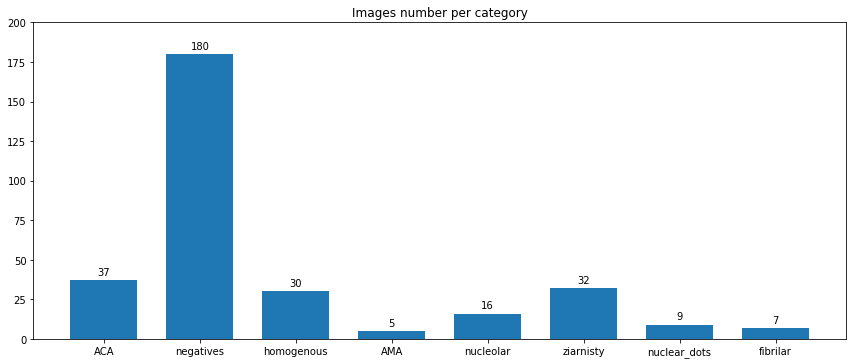

In [3]:
categories = os.listdir(dataset_root)
counts = [len(os.listdir(os.path.join(dataset_root, c))) for c in categories]

x = np.arange(len(counts))
width = 0.7

fig, ax = plt.subplots()
fig.set_size_inches((12, 5))
bars = ax.bar(x, counts, width)

for b in bars:
    height = b.get_height()
    ax.annotate('{}'.format(height),
                xy=(b.get_x() + b.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, max(counts) + 20)

fig.tight_layout()

ax.set_title('Images number per category')

plt.show()

## load images

In [4]:
def load(path, size_wh=None):
    """
    Load image file into numpy array.
    """
    img = Image.open(path)
    
    if size_wh is not None:
        img = img.resize(size_wh)
    
    return np.array(img)

def load_all(root, categories=None, size_wh=None, cluster=False):
    if categories is None:
        categories = os.listdir(root)
        
    result = {}
    for c in categories:
        cat_root = os.path.join(root, c)
        imgs = [load(os.path.join(cat_root, f), size_wh) for f in os.listdir(cat_root)]
        
        if cluster:
            imgs = np.array(imgs)
        
        result[c] = imgs
        
    return result

In [5]:
%%time
loaded = load_all(dataset_root, size_wh=(800, 600), cluster=True)

CPU times: user 2.62 s, sys: 1.54 s, total: 4.16 s
Wall time: 30.8 s


## display images

In [39]:
def display_batch(imgs, rows, cols, wh=None, **plot_kwargs):
    f, axes = plt.subplots(rows, cols)
    axes = axes.reshape(-1)
    
    if wh is not None:
        f.set_size_inches(wh)
    
    for img, a in zip(imgs, axes):
        a.imshow(img, **plot_kwargs)
        a.set_xticks([], [])
        a.set_yticks([], [])
        
    plt.show()

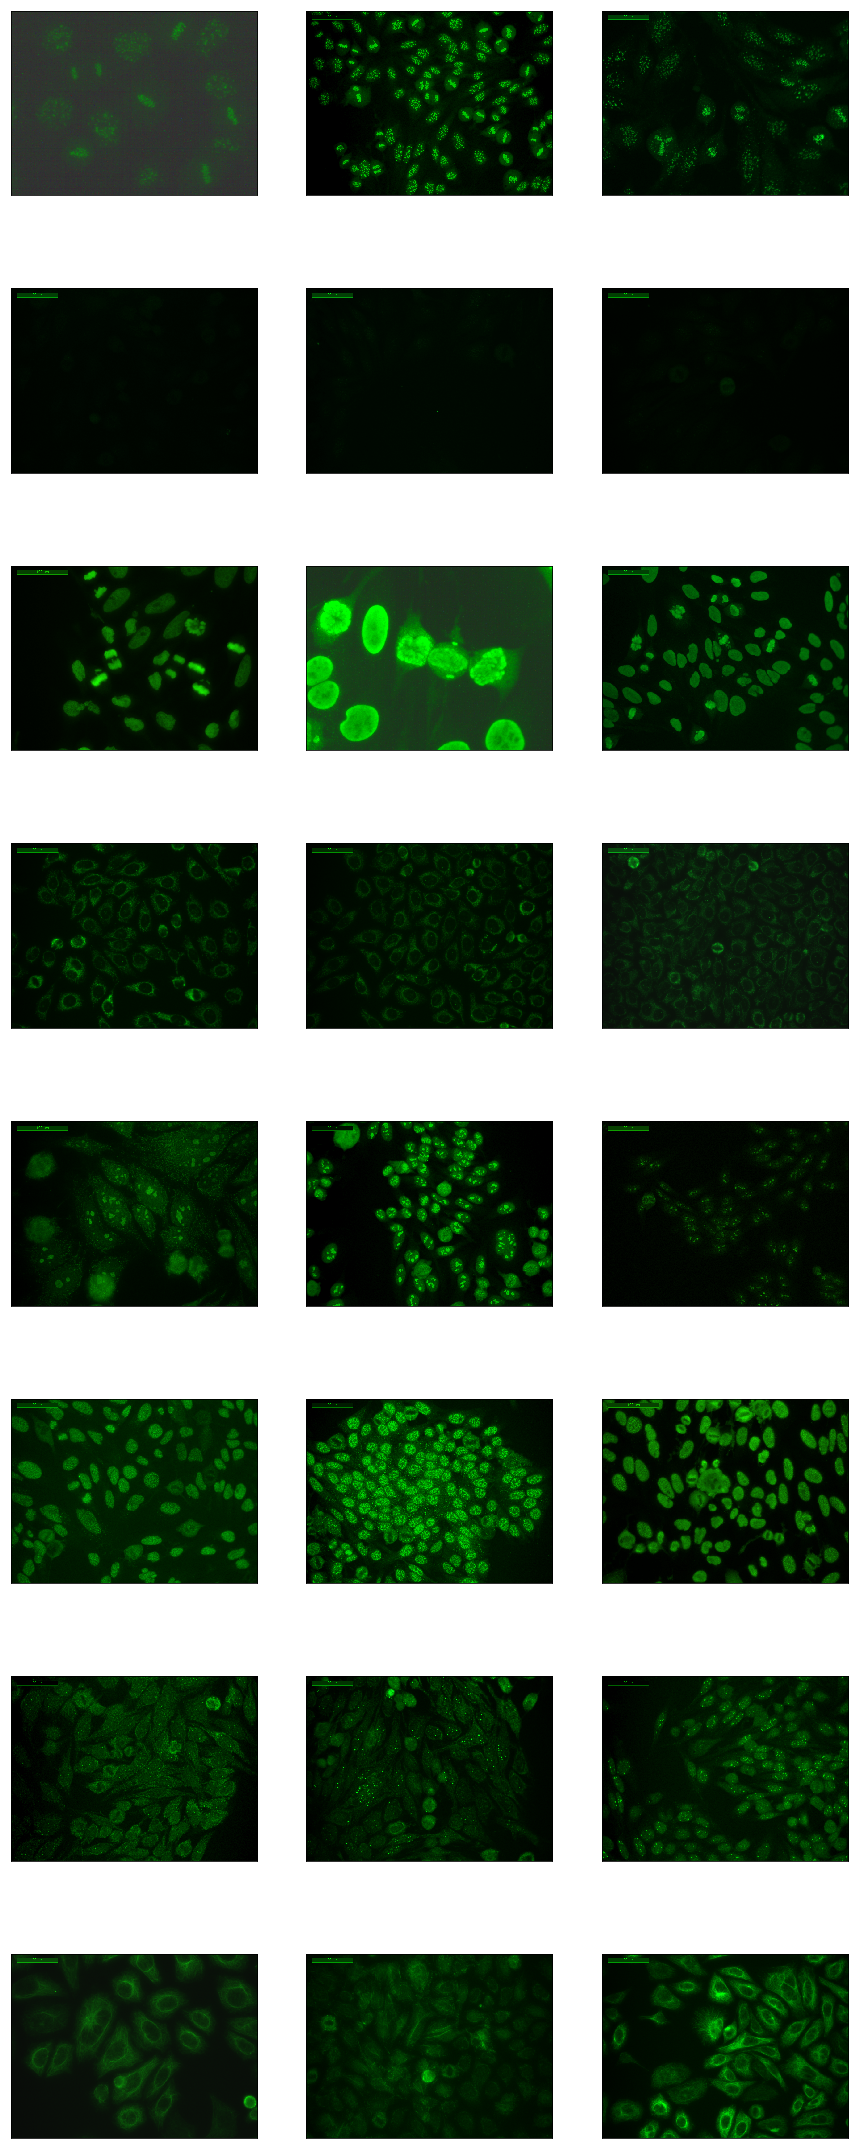

In [53]:
samples = [cat[:3] for cat in loaded.values()] # take 3 imgs from each category
samples = np.concatenate(samples)

display_batch(samples, rows=8, cols=3, wh=(15, 40))

## ACA category

In [54]:
aca_batch = loaded['ACA']

In [55]:
%%time
aca_gray = np.mean(aca_batch, axis=3)
print(aca_gray.shape)

(37, 600, 800)
CPU times: user 355 ms, sys: 46 µs, total: 355 ms
Wall time: 353 ms


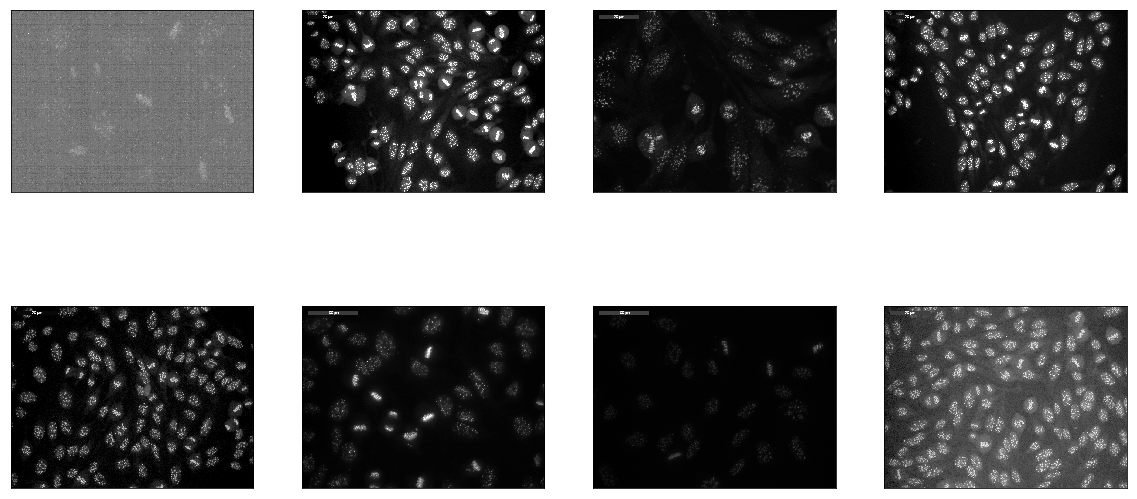

In [58]:
display_batch(aca_gray, rows=2, cols=4, wh=(20, 10), cmap='gray')